In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
df = pd.read_csv("/kaggle/input/customer-satisfaction/customer_satisfaction.csv")

print("✅ Dataset berhasil dimuat!")
print(df.info(), "\n")
print(df.head())

✅ Dataset berhasil dimuat!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           200 non-null    object 
 2   Monthly_Spend    200 non-null    int64  
 3   Service_Usage    200 non-null    int64  
 4   Support_Tickets  200 non-null    int64  
 5   Response_Time    200 non-null    float64
 6   Satisfaction     200 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 11.1+ KB
None 

   Age  Gender  Monthly_Spend  Service_Usage  Support_Tickets  Response_Time  \
0   41    Male         334120              1                1            4.9   
1   51    Male         458536              4                2            1.1   
2   19    Male         405527              4                4            3.0   
3   42  Female         569158              5                1    

In [13]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [14]:
X = df.drop('Satisfaction', axis=1)
y = df['Satisfaction']

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


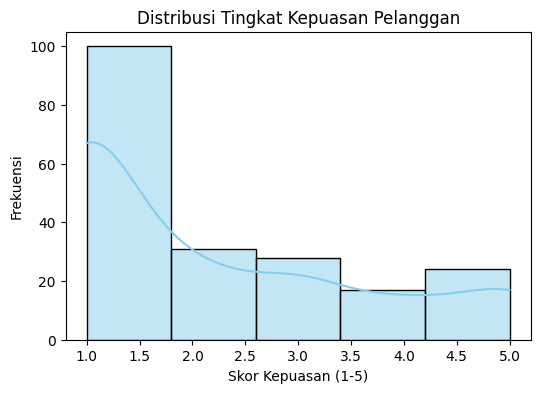

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df['Satisfaction'], kde=True, bins=5, color='skyblue')
plt.title("Distribusi Tingkat Kepuasan Pelanggan")
plt.xlabel("Skor Kepuasan (1-5)")
plt.ylabel("Frekuensi")
plt.show()

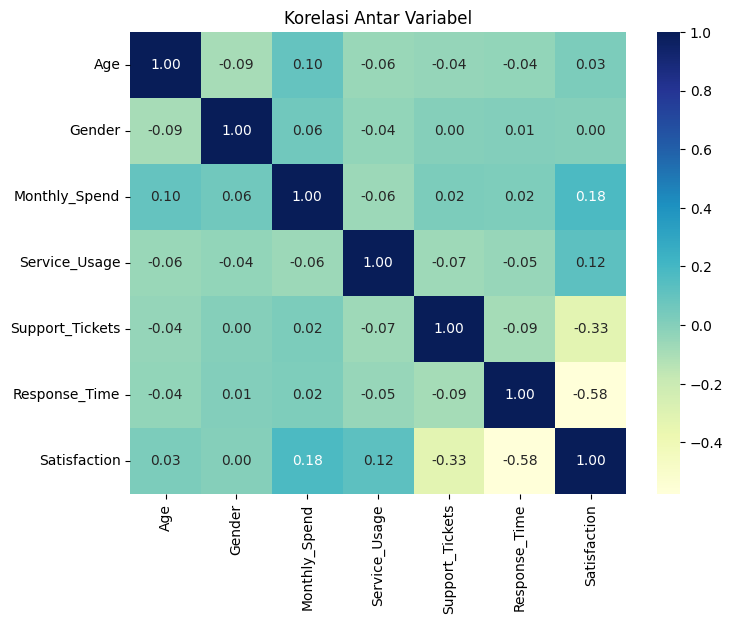

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Korelasi Antar Variabel")
plt.show()

In [19]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [20]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== 📊 Evaluation Metrics ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

=== 📊 Evaluation Metrics ===
Mean Squared Error (MSE): 0.1851
Root Mean Squared Error (RMSE): 0.4302
Mean Absolute Error (MAE): 0.2311
R² Score: 0.9137


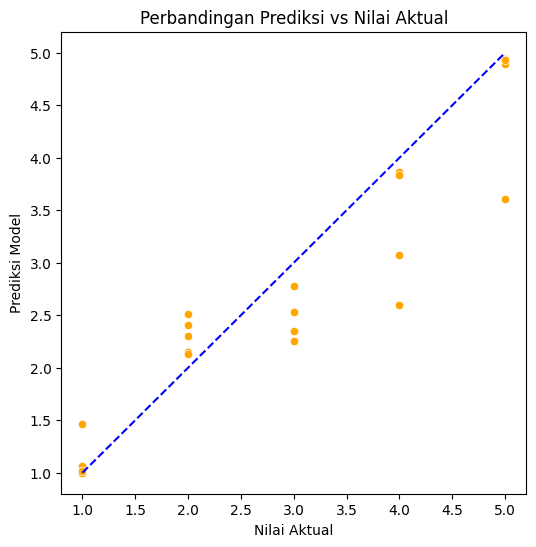

In [21]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, color='orange')
plt.plot([1,5], [1,5], '--', color='blue')
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi Model")
plt.title("Perbandingan Prediksi vs Nilai Aktual")
plt.show()

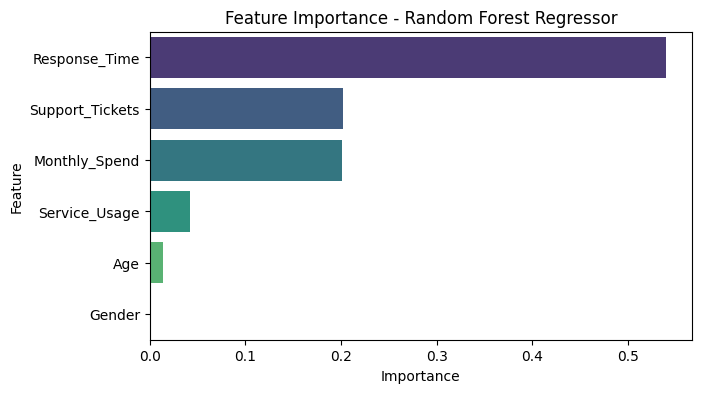

In [22]:
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x='Importance', y='Feature', data=feat_importance, palette='viridis')
plt.title("Feature Importance - Random Forest Regressor")
plt.show()

In [23]:
sample = pd.DataFrame({
    'Age': [30],
    'Gender': [1],
    'Monthly_Spend': [450000],
    'Service_Usage': [5],
    'Support_Tickets': [0],
    'Response_Time': [1.5]
})

sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)
print(f"\n🧍 Prediksi kepuasan pelanggan baru: {pred[0]:.2f} (skala 1–5)")


🧍 Prediksi kepuasan pelanggan baru: 4.97 (skala 1–5)
